# Week 5 - Functions
This week we are making our own package, so we are gonna import the interesting functions from our package to test them.

## load_files

In [1]:
from my_functions import load_files, scatter_plot, compute_biometric_scores, scores_histogram, who_is_in, get_all_metrics, ROC_curve
import numpy as np
from sklearn import metrics

In [2]:
people, people_embeddings = load_files(csv_file="people.csv", npy_file="people_embeddings.npy")
print(people_embeddings.shape)
people.head()

(100, 256)


,names,surnames,ips,passwords,logins
0,Esteban,ASHTON,192.58290.178.68,17081971,esteban_ashton@email.com
1,Ronaldo,TZIPORA,20.9755.27.26,MAnqJ=-1yK,ronaldo_tzipora@email.com
2,Samara,LEIA,23.2109.61.87,Shayan4Ever,samara_leia@email.com
3,Reese,ELIANNY,192.3131.59.238,RELIANNY93,reese_elianny@email.com
4,Josephine,ZARA,38.18584.152.239,Elianna4&ver,josephine_zara@email.com


In [3]:
connections, connection_embeddings = load_files(csv_file="connections.csv", npy_file="connections_embeddings.npy")
print(connection_embeddings.shape, connections.shape)
connections.head()

(30000, 256) (30000, 5)


,logins,passwords,ips,dates,true_attempt
0,rosemary_dahlia@email.com,11051983,77.21291.43.60,05:07:34 16-04-2023,False
1,erika_hannah@email.com,Er1k@1952,23.38787.131.178,11:20:05 23-06-2019,False
2,shaina_jaliyah@email.com,27041973,162.30849.129.34,02:40:27 23-02-2021,False
3,hindy_matthias@email.com,123456,170.8465.17.215,08:10:58 05-09-2019,False
4,paige_bonnie@email.com,PBONN1&97,165.21980.220.91,21:03:16 24-02-2022,False


## scatter_plot

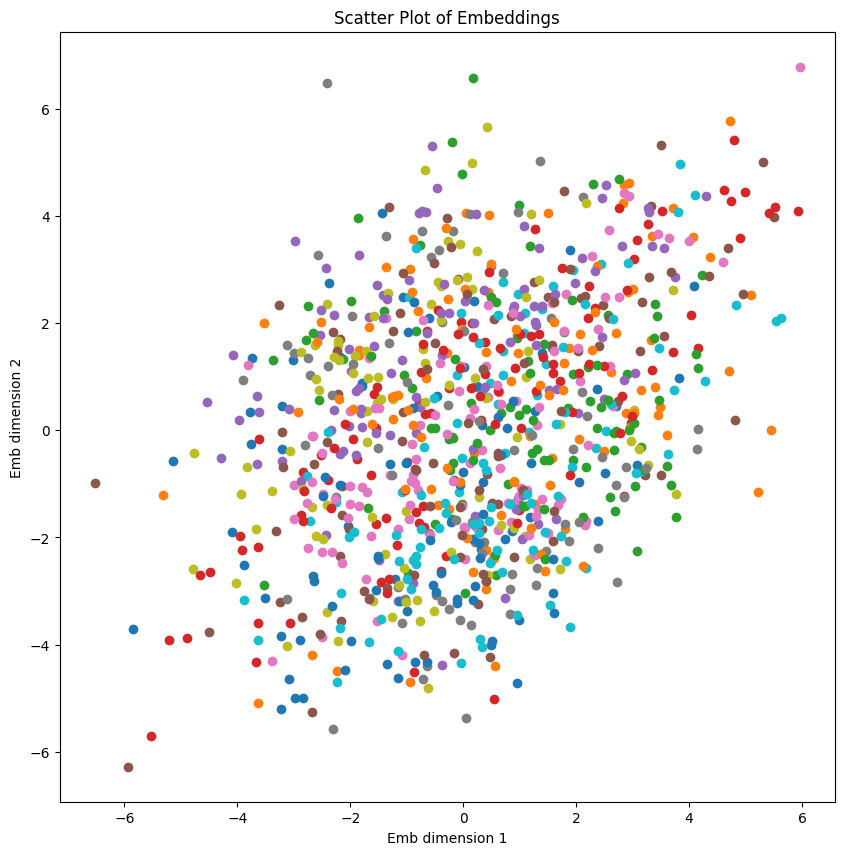

In [4]:
true_attempts = connections[connections['true_attempt']==True]
embeddings = connection_embeddings[list(true_attempts.index)]
scatter_plot(X=embeddings[:,0],
             Y=embeddings[:,1],
             labels=np.array(true_attempts['logins']),
             save_figure='scatterplot.png'
            )

## compute_score and scores_histogram

In [5]:
#compute the scores
connections['scores'] = compute_biometric_scores(people, people_embeddings, 
                                                  connections, connection_embeddings,
                                                  mode='only_compare_same_logins', 
                                                  distance_fct=np.linalg.norm)

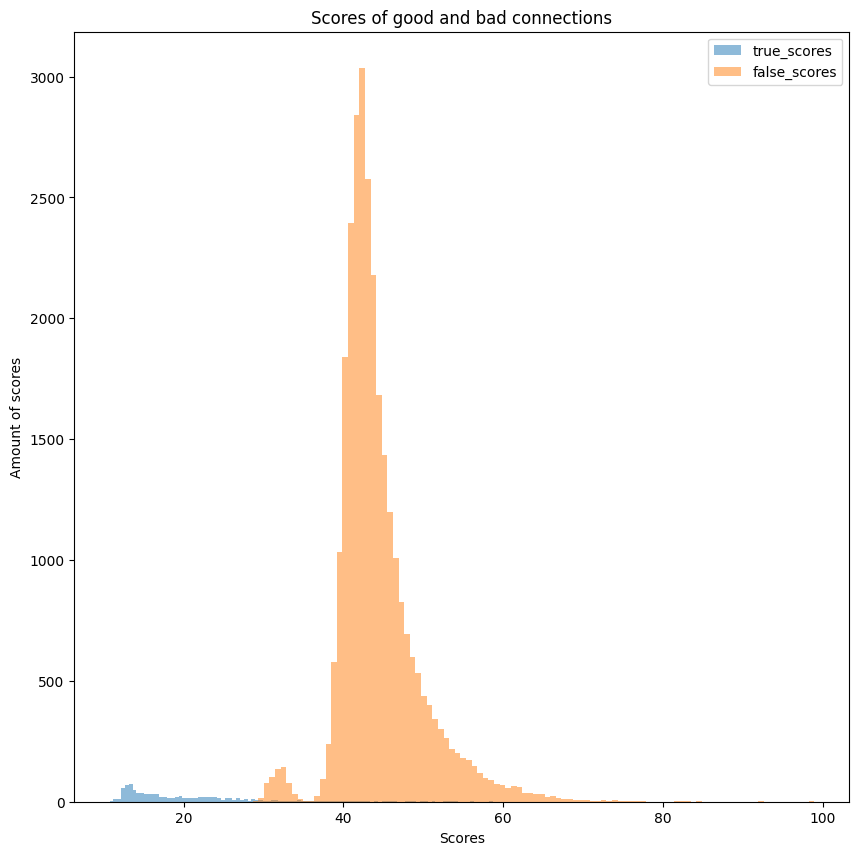

In [6]:
#plot the histogram of scores
scores_histogram(list(connections[connections['true_attempt']==True]['scores']),
                 list(connections[connections['true_attempt']==False]['scores']),
                 save_figure=False)

## ROC_curve

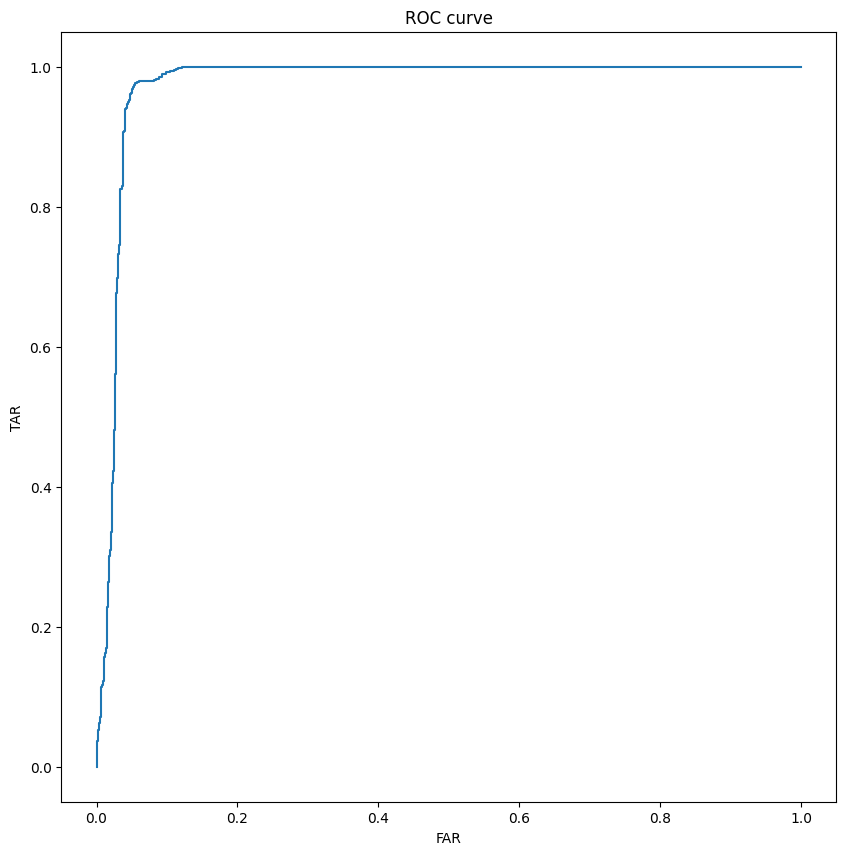

<Figure size 640x480 with 0 Axes>

In [7]:
#get FAR and TAR using sklearn function
TAR, FAR, thresholds = metrics.roc_curve(list(connections['true_attempt'].astype(int)),
                                        list(connections['scores'])
                                       )
# plot the ROC curve
ROC_curve(FAR, TAR, 'my_roc_curve.png') 

# Authentication part
## Who_is_in

In [8]:


# Find who should get in the system
accepted = who_is_in(people, connections, threshold = 30)
connections['accepted']=accepted

In [9]:
# Measure how is your system behaving
get_all_metrics(accepted, 
                list(connections['true_attempt']), 
                print_output=True,
                save_output=True,
                log_file='output_week5.log')

TAR: 100.0
FAR: 0.0
TRR: 100.0
FRR: 0.0
Accuracy: 100.0

